In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line


In [425]:
data = pd.read_csv("data.csv",encoding='unicode_escape') # escape unicode to read data corectly
data_description = pd.read_csv("dictionary.csv")

Show data's first 5 columns

In [426]:
print("Data Shape", data.shape)
data.head()

Data Shape (472, 116)


,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


### Clear data 

Fix dtypes of columns

In [427]:
# get  data types of columns without changing dtypes

data.dtypes.value_counts() 

object     108
float64      5
int64        3
dtype: int64

In [428]:
# replace no info values to np.nan, it's done to prevent it changing column data type
data = data.replace("No Info", np.nan)
data = data.replace("NO INFO", np.nan)
data = data.replace("NAN", np.nan)
# convert columns type to numeric which are valid numbers
data["Last round of funding received (in milionUSD)"] = data["Last round of funding received (in milionUSD)"].replace("unknown amount", np.nan)
data[data.columns] = data[data.columns].apply(pd.to_numeric, errors = "ignore")


In [429]:

data.dtypes.value_counts() 

object     74
float64    39
int64       3
dtype: int64

Inspect some columns which can be transfered from categorical to numerical 

In [430]:
data["Presence of a top angel or venture fund in previous round of investment"].value_counts()

No     282
Yes     93
Name: Presence of a top angel or venture fund in previous round of investment, dtype: int64

In [431]:
data["Has the team size grown"].value_counts()

No     266
yes    101
Yes     47
YES      7
Name: Has the team size grown, dtype: int64

In [432]:
data["Number of  Sales Support material"].value_counts()

low        150
medium     120
Nothing     81
high        72
High         1
Name: Number of  Sales Support material, dtype: int64

In [433]:
data["Average size of companies worked for in the past"].value_counts()

Small     228
Medium    130
Large      83
Name: Average size of companies worked for in the past, dtype: int64

In [434]:
data["Number of  of Partners of company"].value_counts()

None    284
Few      73
Many     14
Name: Number of  of Partners of company, dtype: int64

Replace some values from categorical columns to make them numerical 

In [435]:
# columns which include yes or no answers 

binary_answers_to_num_cols = ["Presence of a top angel or venture fund in previous round of investment", 
                  "Has the team size grown", "Worked in top companies",
                              "Have been part of startups in the past?",
                             "Have been part of successful startups in the past?",
                             "Was he or she partner in Big 5 consulting?","Consulting experience?",
                             "Catering to product/service across verticals",
                              "Focus on consumer data?",
                             "Subscription based business",
                             "Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",
                             "Crowdsourcing based business","Crowdfunding based business",
                             "Machine Learning based business","Predictive Analytics business",
                             "Speech analytics business", "Prescriptive analytics business",
                             "Big Data Business", "Cross-Channel Analytics/ marketing channels",
                             "Owns data or not? (monetization of data) e.g. Factual",
                            "Is the company an aggregator/market place? e.g. Bluekai",
                             "Exposure across the globe","Relevance of education to venture",
                             "Relevance of experience to venture","Pricing Strategy","Hyper localisation",
                             "Long term relationship with other founders",
                             "Proprietary or patent position (competitive position)",
                             "Barriers of entry for the competitors","Company awards",
                             "Technical proficiencies to analyse and interpret unstructured data",
                             "Solutions offered", "Invested through global incubation competitions?",
                             ]
# columns which include low medium high nothing answers
quartet_answers_to_num_cols = ["Number of  Sales Support material",
                              "Top forums like \'Tech crunch\' or \'Venture beat\' talking about the company/model - How much is it being talked about?",
                              "Breadth of experience across verticals","Experience in selling and building products",
                              "Top management similarity",
                              "Team Composition score","Time to market service or product",
                              "Average Years of experience for founder and co founder",
                              "Dificulty of Obtaining Work force","Disruptiveness of technology"]
# columns which inlcude small medium large
triple_answers_to_num_cols = ["Average size of companies worked for in the past",
                             ]

# columns which include medium, few
comparative_answers_no_num_cols = ["Number of  of Partners of company", "Number of  of Research publications",
                                  ]

In [436]:
# make all variables to uppercase to make them in same category
data[binary_answers_to_num_cols] = data[binary_answers_to_num_cols].apply(lambda x: x.astype(str).str.upper())
data[quartet_answers_to_num_cols] = data[quartet_answers_to_num_cols].apply(lambda x: x.astype(str).str.upper())
data[triple_answers_to_num_cols] = data[triple_answers_to_num_cols].apply(lambda x: x.astype(str).str.upper())
data[comparative_answers_no_num_cols] = data[comparative_answers_no_num_cols].apply(lambda x: x.astype(str).str.upper())

# change values to numerical
data[binary_answers_to_num_cols] = data[binary_answers_to_num_cols].replace("NO", 0)
data[binary_answers_to_num_cols] = data[binary_answers_to_num_cols].replace("YES", 1)

data[quartet_answers_to_num_cols] = data[quartet_answers_to_num_cols].replace("NOTHING", 0)
data[quartet_answers_to_num_cols] = data[quartet_answers_to_num_cols].replace("NONE", 0)
data[quartet_answers_to_num_cols] = data[quartet_answers_to_num_cols].replace("LOW", 1)
data[quartet_answers_to_num_cols] = data[quartet_answers_to_num_cols].replace("MEDIUM", 2)
data[quartet_answers_to_num_cols] = data[quartet_answers_to_num_cols].replace("HIGH", 3)

data[triple_answers_to_num_cols] = data[triple_answers_to_num_cols].replace("SMALL", 0)
data[triple_answers_to_num_cols] = data[triple_answers_to_num_cols].replace("MEDIUM", 1)
data[triple_answers_to_num_cols] = data[triple_answers_to_num_cols].replace("LARGE", 2)


data[comparative_answers_no_num_cols] = data[comparative_answers_no_num_cols].replace("NONE", 0)
data[comparative_answers_no_num_cols] = data[comparative_answers_no_num_cols].replace("FEW", 1)
data[comparative_answers_no_num_cols] = data[comparative_answers_no_num_cols].replace("MANY", 2)


data["Employee benefits and salary structures"] = data["Employee benefits and salary structures"].replace("Bad", 0)
data["Employee benefits and salary structures"] = data["Employee benefits and salary structures"].replace("Good",1 )
data["Employee benefits and salary structures"] = data["Employee benefits and salary structures"].replace("Average",2 )
data["Employee benefits and salary structures"] = data["Employee benefits and salary structures"].replace("Very Good",3)


In [437]:
data["Average Years of experience for founder and co founder"].value_counts()

3      271
2      108
NAN     80
1       13
Name: Average Years of experience for founder and co founder, dtype: int64

In [438]:
# change NaN back srom string to numpy nan object
data = data.replace("NAN", np.nan)
data[data.columns] = data[data.columns].apply(pd.to_numeric, errors = "ignore")

In [439]:
data.dtypes.value_counts() # get  data types of columns 

float64    85
object     27
int64       4
dtype: int64

##### Seperate categorical, numerical columns and target column

In [440]:
# get target 
target_col = 'Dependent-Company Status'

# get  numerical features
num_col = list(data.select_dtypes(include=['int64','float64']).columns)



"""
get categorical features
I exclude target column, some intiutevly not related features and company names from categorical features
"""
excluded_features = ["Controversial history of founder or co founder", "Legal risk and intellectual property",
                       "Client Reputation", "Dependent-Company Status", "Est. Founding Date"]
cat_col = [feat for feat in data.columns if feat not in (num_col+[target_col, "Company_Name"]+excluded_features)]

cols = num_col+cat_col+[target_col]

In [441]:
data[target_col][data[target_col]=="Success"] = 1
data[target_col][data[target_col]=="Failed"]= 0
data = data[cols]
data.head()

/home/vachik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/vachik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year of founding,Age of company in years,Internet Activity Score,Employee Count,Employees count MoM change,Has the team size grown,Last Funding Amount,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,...,Linear or Non-linear business model,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Highest education,Specialization of highest education,Degree from a Tier 1 or Tier 2 university?,"Survival through recession, based on existence of the company through recession times",Gartner hype cycle stage,Time to maturity of technology (in years),Dependent-Company Status
0,NaN,NaN,-1.0,3.0,0.0,0.0,450000.0,2.0,0.0,1,...,Linear,Online,B2C,Masters,business,Tier_1,NaN,NaN,NaN,1
1,2011.0,3.0,125.0,NaN,NaN,0.0,NaN,5.0,0.0,2,...,Non-Linear,Online,B2C,Masters,Supply Chain Management & Entrepreneurship,Tier_1,Not Applicable,Trough,2 to 5,1
2,2011.0,3.0,455.0,14.0,0.0,0.0,2350000.0,15.0,0.0,3,...,Non-Linear,Online,B2B,Bachelors,General,Tier_2,Not Applicable,Trough,2 to 5,1
3,2009.0,5.0,-99.0,45.0,10.0,0.0,10250000.0,6.0,0.0,2,...,Non-Linear,Online,B2C,Bachelors,Computer Systems Engineering,Tier_2,Not Applicable,Trough,2 to 5,1
4,2010.0,4.0,496.0,39.0,3.0,0.0,5500000.0,7.0,0.0,1,...,Non-Linear,Online,B2B,Bachelors,Industrial Engineering and Computer Science,None,Not Applicable,NaN,NaN,1


In [442]:
data.dtypes.value_counts()

float64    85
object     22
int64       4
dtype: int64

### Time to handle the nan values
It's reasonable to fill nan values in numerical features (which were not *yes or no, low, medium, high, small etc.*  ) with average values, the mentioned categories we will fill with  ffill (use previous valid observation to fill gap)

First fill last mentioned values

In [443]:

data[binary_answers_to_num_cols + triple_answers_to_num_cols+
    quartet_answers_to_num_cols +
     triple_answers_to_num_cols+
    comparative_answers_no_num_cols +
     ["Employee benefits and salary structures"]] = data[binary_answers_to_num_cols
                                                         + triple_answers_to_num_cols+quartet_answers_to_num_cols
                                                         +triple_answers_to_num_cols+
                                                         comparative_answers_no_num_cols + 
                                                         ["Employee benefits and salary structures"]].fillna(method = "ffill")


Now filling other numerical features

In [444]:
mean_filled_columns = [e for e in data.columns if e not in (binary_answers_to_num_cols + triple_answers_to_num_cols+
    quartet_answers_to_num_cols +
     triple_answers_to_num_cols+
    comparative_answers_no_num_cols +
     ["Employee benefits and salary structures"])]

data[mean_filled_columns] = data[mean_filled_columns].fillna(data[mean_filled_columns].mean())

Time to fill nan is categorical features

In [445]:
data[cat_col] = data[cat_col].fillna(method = "ffill")
data[cat_col] = data[cat_col].fillna(method = "bfill")


data[cat_col].sample(1)

,Short Description of company profile,Industry of company,Focus functions of company,Investors,Last Funding Date,Country of company,Continent of company,Product or service company?,Focus on private or public data?,Focus on structured or unstructured data,...,Local or global player,Linear or Non-linear business model,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Highest education,Specialization of highest education,Degree from a Tier 1 or Tier 2 university?,"Survival through recession, based on existence of the company through recession times",Gartner hype cycle stage,Time to maturity of technology (in years)
115,Business Dashboards,Mobile|Marketing,operations,Chris DeVore|Tom Peterson|Aaron Bird|Founder's...,12/20/2012,United States,North America,Product,Public,Both,...,Global,Non-Linear,Online,B2B,Bachelors,Economics,None,Not Applicable,Peak,5 to 10


In [446]:
data["Last round of funding received (in milionUSD)"]

0       0.45000
1       5.00000
2       2.35000
3      10.25000
4       5.50000
         ...   
467     5.86633
468     5.86633
469     5.86633
470     5.86633
471     5.86633
Name: Last round of funding received (in milionUSD), Length: 472, dtype: float64

In [447]:
len(data.columns[data.isna().any()].tolist())

1

In [372]:
data.to_csv("filterd_data.csv")

In [373]:
len(cat_col)

22

In [385]:
any(data.isna().any())


True

<IPython.core.display.Javascript object>

/home/vachik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


<IPython.core.display.Javascript object>

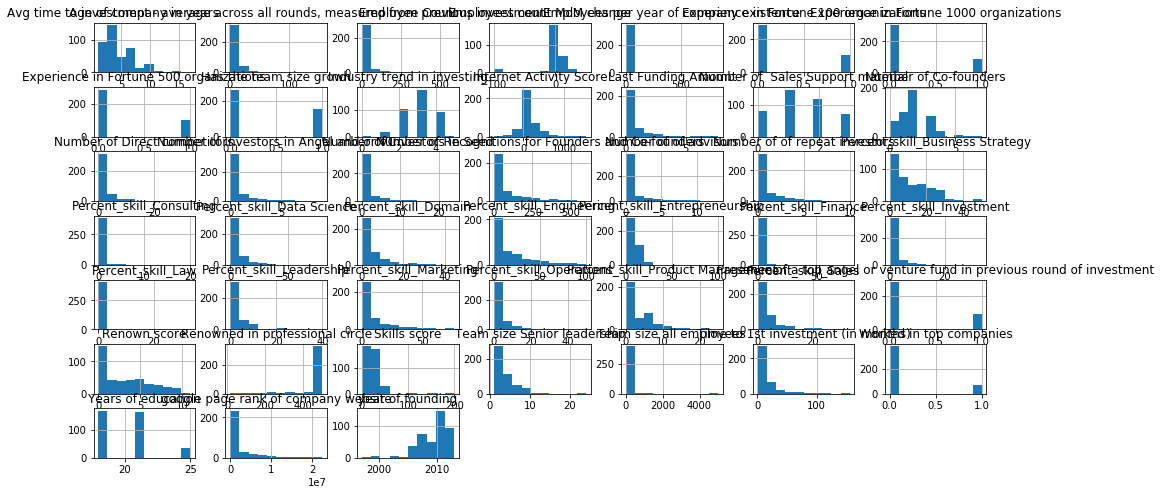

In [20]:
data.hist(column=num_col, figsize = (16, 8))
plt.tight_layout()
plt.show()


In [21]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [22]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=10, alpha=.8)
None

ValueError: 'c' argument has 472 elements, which is not acceptable for use with 'x' with size 413, 'y' with size 413.

Error in callback <function flush_figures at 0x7fec1c7e9f80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
'Dependent-Company Status' data.corr().columns